In [7]:
%load_ext autoreload
%autoreload 2
from creme import creme
from creme import utils
from creme import custom_model
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Enformer and example sequences

In [8]:
track_index = [5111]
model = custom_model.Enformer(track_index=track_index)
target_df = pd.read_csv(f'../data/enformer_targets_human.txt', sep='\t')
cell_line_info = {i: [t, utils.clean_cell_name(target_df.iloc[t]['description'])] for i, t in
              enumerate(track_index)}

In [75]:
fasta_path = f'../data/GRCh38.primary_assembly.genome.fa'
seq_parser = utils.SequenceParser(fasta_path)

gene = 'GATA2_chr3_128487916_-'

gene_name, chrom, start, strand = gene.split('_')
wt_seq = seq_parser.extract_seq_centered(chrom, int(start), '-', model.seq_length)


In [76]:
# TSS bin indeces
bins = [447, 448]

In [77]:
wt = model.predict(wt_seq)[0,:,0]


<Axes: >

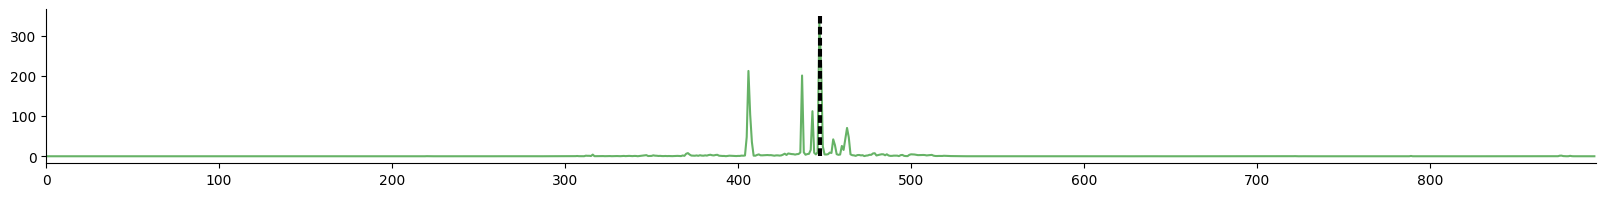

In [80]:
utils.plot_track([wt], color='green', zoom=[0, 896], marks=bins)


# Necessity test
In this example we will test the necessity of (5Kb) tiles in the context of an enhancing context sequence of GATA2 gene. 

To run the test we need:
- a loaded model
- onehot encoded sequence (WT) of the sequence
- a list of tile coordinates to test
- num_shuffle - number of shuffled
- optionally, we can set mean=False to not average the shuffle results
- optionally, we can set return_seqs to True to return the shuffled sequeneces for future use



In [110]:

perturb_window = 5000
N_shuffles = 10
tss_tile, cre_tiles = utils.set_tile_range(model.seq_length, perturb_window)
cre_tiles = cre_tiles[19:20]
print(f'Enhancing tile at position {cre_tiles[0][0]} - {cre_tiles[0][1]}')
print(f'TSS tile at center position {tss_tile[0]} - {tss_tile[1]}')

Enhancing tile at position 100804 - 105804
TSS tile at center position 95804 - 100804


## Necessity of an enhancing tile of GATA2 gene TSS

In [103]:
_, pred_mut = creme.necessity_test(model, wt_seq, cre_tiles, N_shuffles, mean=False)

100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.73s/it]


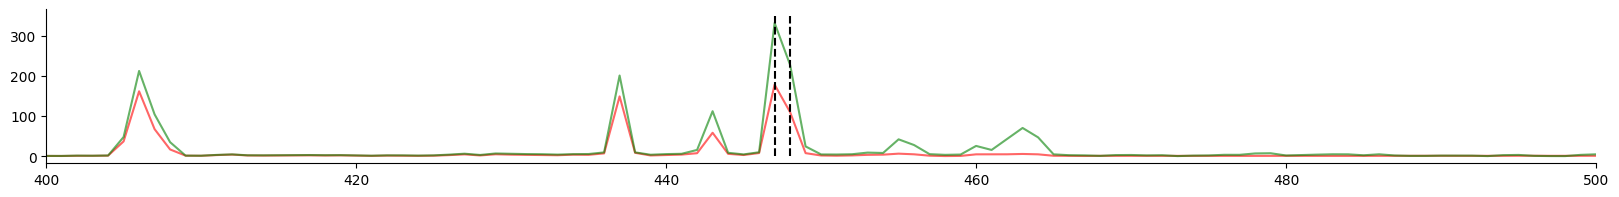

In [104]:

for p in pred_mut.mean(axis=1)[:,:,0]:
    ax=utils.plot_track([p], color='red')
   
    utils.plot_track([wt], ax=ax, zoom=[400, 500], marks=[447,448], color='green')
